In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("weatherdata.csv")

In [3]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Answer         0
dtype: int64

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

print("Encoded DataFrame:")
df

Encoded DataFrame:


,Outlook,Temperature,Humidity,Wind,Answer
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


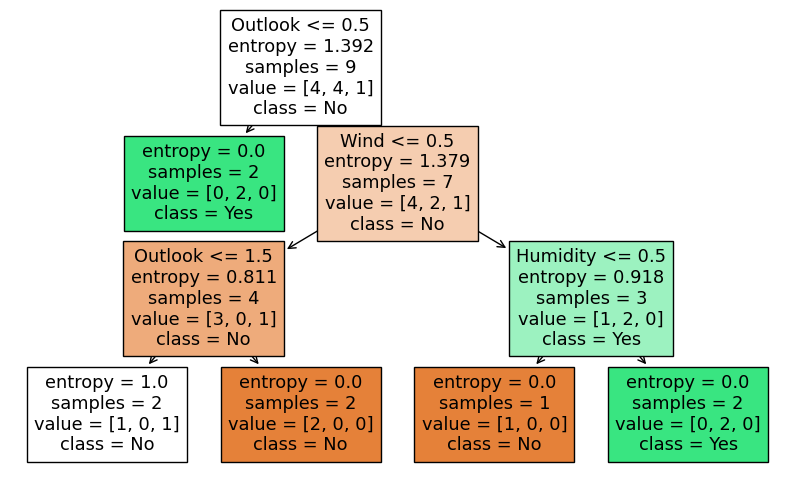

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = df.drop(columns=['Answer'])
y = df['Answer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()


In [6]:
new_sample = [[2, 1, 0, 1]]  
prediction = clf.predict(new_sample)
print("Prediction on new sample : ",prediction)


Prediction on new sample :  [0]


C:\Users\jaiva\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('drugdata.csv')

label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

data.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,0,0,0,25.355,4
1,1,47,1,1,0,13.093,2
2,2,47,1,1,0,10.114,2
3,3,28,0,2,0,7.798,3
4,4,61,0,1,0,18.043,4


In [8]:
data.drop(columns=['Unnamed: 0'], inplace=True)

data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


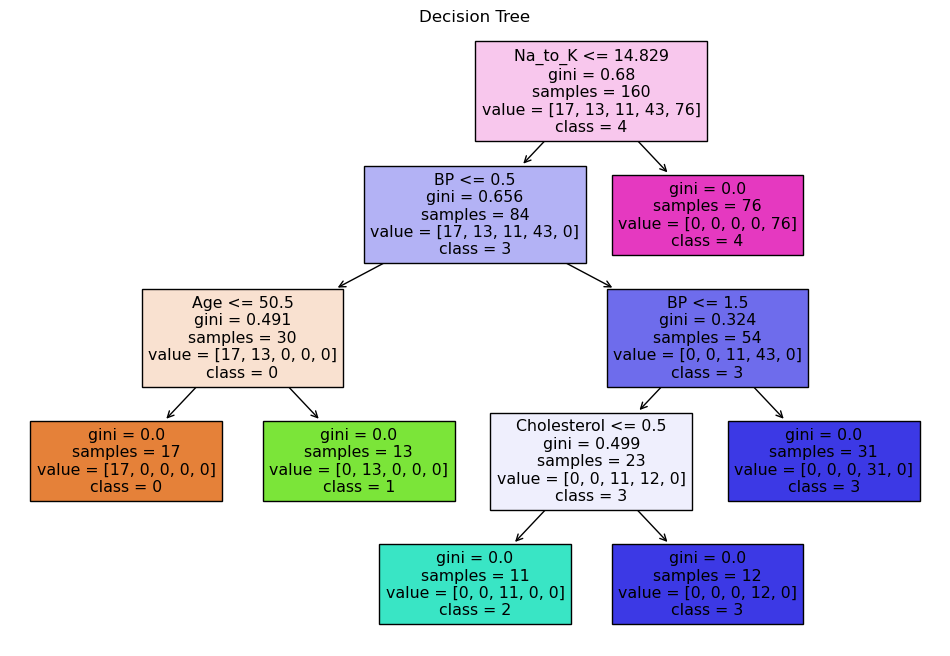

Predicted drug for the new patient: [4]


C:\Users\jaiva\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [9]:
X = data.drop(columns=['Drug'])
y = data['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=list(X.columns), class_names=[str(i) for i in clf.classes_])

plt.title("Decision Tree")
plt.show()

new_patient = [[35, 1, 0, 0,25]]
prediction = clf.predict(new_patient)
print("Predicted drug for the new patient:", prediction)